<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import sys  
#!{sys.executable} -m pip install --user pandas
#!{sys.executable} -m pip install --user plotly

!{sys.executable} -m pip install --user statsmodels


[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#pip list

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [4]:
# =============================== МОЖНО УДАЛИТЬ БЛОК ИЗ ФИНАЛА ===================================================
import io
with io.open('data/dst-3.0_16_1_hh_database.csv', encoding='utf-8') as file:
    # читаем первую строку  
    first_line = file.readline()  
    print('Первая строка:', first_line) 
    # читаем вторую строку
    first_line = file.readline()  
    print('Первая строка:', first_line) 

#with open('data/dst-3.0_16_1_hh_database.csv', 'r') as file:  
#    # читаем первую строку  
#    first_line = file.readline()  
#    # выводим первую строку  
#    print('Первая строка:', first_line)  

Первая строка: Пол, возраст;ЗП;Ищет работу на должность:;Город, переезд, командировки;Занятость;График;Опыт работы;Последнее/нынешнее место работы;Последняя/нынешняя должность;Образование и ВУЗ;Обновление резюме;Авто

Первая строка: Мужчина ,  39 лет , родился 27 ноября 1979;29000 руб.;Системный администратор;Советск (Калининградская область) , не готов к переезду , не готов к командировкам;частичная занятость, проектная работа, полная занятость;гибкий график, полный день, сменный график, вахтовый метод, удаленная работа;"Опыт работы 16 лет 10 месяцев  Август 2010 — по настоящее время 8 лет 10 месяцев МАОУ ""СОШ № 1 г.Немана"" Системный администратор Обслуживание ПК,установка ПО, ремонт, периферийной техники, Интернет локальная сеть. Ведение Электронного журнала, сайта организации.  Август 2002 — Август  2010 8 лет 1 месяц ТС ""ВЕСТЕР-ИНФО"" Старший продавец, директор отдела Продажи компьютерной техники";"МАОУ ""СОШ № 1 г.Немана""";Системный администратор;Неоконченное высшее образовани

In [5]:
#ваш код здесь
hh_data = pd.read_csv('data/dst-3.0_16_1_hh_database.csv',sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [6]:
#ваш код здесь
hh_data.head(2)

Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность  \
0                           Системный администратор   
1  Менеджер проекта, Аналитик, Технический писатель   

                                   Образование и ВУЗ Обновление резюме  \
0  Неоконченное высшее образование 2000  Балтийск...  16.04.2019 15:59   
1  Высшее образование 1981  Военно-космическая ак...  12.04.2019 08:42   

                             Авто  
0  Имеется собственный автомобиль  
1                      Не указано

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [7]:
print(hh_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

5. Выведите основную статистическую информацию о столбцах.


In [8]:
#ваш код здесь
hh_data.describe()

Пол, возраст          ЗП  \
count                                           44744       44744   
unique                                          16003         690   
top     Мужчина ,  32 года , родился 17 сентября 1986  50000 руб.   
freq                                               18        4064   

       Ищет работу на должность:  \
count                      44744   
unique                     14929   
top      Системный администратор   
freq                        3099   

                             Город, переезд, командировки         Занятость  \
count                                               44744             44744   
unique                                              10063                38   
top     Москва , не готов к переезду , не готов к кома...  полная занятость   
freq                                                 1261             30026   

             График                                        Опыт работы  \
count         44744                                              44576   
unique           47                                              44413   
top     полный день  Опыт работы 10 лет 8 месяцев  Апрель 2018 — по...   
freq          22727                                                  3   

                          Последнее/нынешнее место работы  \
count                                               44743   
unique                                              30214   
top     Индивидуальное предпринимательство / частная п...   
freq                                                  935   

       Последняя/нынешняя должность  \
count                         44742   
unique                        16927   
top         Системный администратор   
freq                           2062   

                                        Образование и ВУЗ Обновление резюме  \
count                                               44744             44744   
unique                                              40148             18838   
top     Высшее образование 2014 Тюменский Государствен...  07.05.2019 09:50   
freq                                                    4                25   

              Авто  
count        44744  
unique           2  
top     Не указано  
freq         32268

In [9]:
# =============================== МОЖНО УДАЛИТЬ БЛОК ИЗ ФИНАЛА ===================================================
print(hh_data.shape) #Чему равна размерность таблицы?
print(hh_data['Опыт работы'].nunique()) #Сколько уникальных значений содержится в столбце «Опыт работы»?
hh_data['Последняя/нынешняя должность'].value_counts() #Какая из искомых должностей самая распространённая?


(44744, 12)
44413


Последняя/нынешняя должность
Системный администратор                         2062
Инженер                                          882
Инженер-программист                              671
Программист                                      463
Руководитель проектов                            369
                                                ... 
Инженер-микроэлектроники                           1
Начальник отдела продаж новостроек                 1
Web-мастер (фриланс)                               1
Ведущий инженер по планированию и учету ПАГК       1
SMM-менеджер/ SEO                                  1
Name: count, Length: 16927, dtype: int64

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
#ваш код здесь
def get_education(raw_edu):
    edu_types = ["неоконченное высшее", "высшее", "среднее специальное","среднее"]
    raw_edu = ' '.join(raw_edu.split()[:3]) #оставляем только первые 3 слова
    raw_edu = raw_edu.lower().strip()
    for edu_type in edu_types:
        #print(edu_type + ' ' + str(raw_edu.find(edu_type)))
        if raw_edu.find(edu_type)==0:
            return edu_type
        elif raw_edu.find(edu_type)>0:
            print(raw_edu)
            return edu_type
    return 'НЕ ОПРЕДЕЛЕНО'

hh_data['Образование'] = hh_data.apply(lambda row: get_education(row['Образование и ВУЗ']),axis=1)
hh_data = hh_data.drop(['Образование и ВУЗ'],axis=1)

print(hh_data['Образование'].unique())
display(hh_data['Образование'].value_counts()) #cколько соискателей имеет средний уровень образования (школьное образование)?

['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']


Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
#ваш код здесь
def get_sex_and_age(raw_seag):
    list_seag = raw_seag.split(',')
    raw_sex = list_seag[0].lower().strip()
    if raw_sex=='мужчина':
        proc_sex='M'
    elif raw_sex=='женщина':
        proc_sex='Ж'
    else:
        proc_sex='0'
    proc_age = int(list_seag[1].split()[0])
    return pd.Series([proc_sex,  proc_age]) # возв

# три рабочих способа: 
#hh_data[['Пол', 'Возраст']] = hh_data.apply(lambda row:get_sex_and_age(row['Пол, возраст']), axis=1)
#hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(lambda seag:get_sex_and_age(seag))
hh_data[['Пол', 'Возраст']] = hh_data['Пол, возраст'].apply(get_sex_and_age)

display(hh_data.head(2))
print(hh_data['Пол'].value_counts())


Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  
0  Имеется собственный автомобиль  неоконченное высшее   M       39  
1                      Не указано               высшее   M       60

Пол
M    36211
Ж     8533
Name: count, dtype: int64


In [12]:
#ваш код здесь (ВЕРСИЯ 2)
def get_sex_and_age_v2(raw_seag):
    list_seag = raw_seag.split(',')
    raw_sex = list_seag[0].lower().strip()
    if raw_sex=='мужчина':
        proc_sex='M'
    elif raw_sex=='женщина':
        proc_sex='Ж'
    else:
        proc_sex='0'
    proc_age = int(list_seag[1].split()[0])
    return [proc_sex,  proc_age]

hh_data[['Пол', 'Возраст']] = pd.DataFrame(hh_data['Пол, возраст'].apply(get_sex_and_age_v2).to_list())

display(hh_data.head(2))
print(hh_data['Пол'].value_counts())

hh_data = hh_data.drop(['Пол, возраст'],axis=1)

# to_list()
#print(type(hh_data22['Пол, возраст'].apply(get_sex_and_age_v2)))
#print(hh_data22['Пол, возраст'].apply(get_sex_and_age_v2))
# to_list()
#print(type(hh_data22['Пол, возраст'].apply(get_sex_and_age_v2).to_list()))
#print(hh_data22['Пол, возраст'].apply(get_sex_and_age_v2).to_list())
# + DataFram^
#print(pd.DataFrame((hh_data22['Пол, возраст'].apply(get_sex_and_age_v2).to_list())))


Пол, возраст          ЗП  \
0  Мужчина ,  39 лет , родился 27 ноября 1979  29000 руб.   
1   Мужчина ,  60 лет , родился 20 марта 1959  40000 руб.   

  Ищет работу на должность:  \
0   Системный администратор   
1      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

                                         Опыт работы  \
0  Опыт работы 16 лет 10 месяцев  Август 2010 — п...   
1  Опыт работы 19 лет 5 месяцев  Январь 2000 — по...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  
0  Имеется собственный автомобиль  неоконченное высшее   M       39  
1                      Не указано               высшее   M       60

Пол
M    36211
Ж     8533
Name: count, dtype: int64


In [13]:
#Сколько процентов женских резюме представлено в наших данных? 
print(hh_data['Пол'][hh_data['Пол']=='Ж'].count()/ len(hh_data['Пол']))
print(hh_data.groupby('Пол').size() / len(hh_data['Пол']) * 100)
#print(hh_data2.groupby('Пол').size())

#Чему равен средний возраст соискателей? Ответ округлите до десятых.
round(hh_data['Возраст'].mean(),1)


0.19070713391739674
Пол
M    80.929287
Ж    19.070713
dtype: float64


np.float64(32.2)

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [14]:
#ваш код здесь
def get_experience(raw_exp):
    
    try:
    
        if (isinstance(raw_exp, (str))==False and np.isnan(raw_exp)):
            return np.nan
        elif raw_exp.strip().lower() in ['не указано','']:
            #print(raw_exp)
            return np.nan
    
        result_ym_exp = 0
        result_m_exp = 0
   
        list_exp = raw_exp.split(' ')
        for id_exp, val_exp in enumerate(list_exp[:7]):
            if val_exp.isnumeric():

                if (id_exp+1)>len(list_exp):
                    pass
                elif (list_exp[id_exp+1].find('год')>-1 or list_exp[id_exp+1].find('лет')>-1):
                    result_ym_exp = result_ym_exp + int(val_exp)*12
                elif list_exp[id_exp+1].find('мес')>-1:
                    result_m_exp = result_m_exp + int(val_exp)

            if result_ym_exp>0 and result_m_exp>0:
                break
        
        return int(result_ym_exp + result_m_exp)
    
    except (TypeError, ValueError, IndexError, AttributeError) as e:
        print(e,' - ', raw_exp)
        return -1


hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы'].apply(lambda x: get_experience(x))
hh_data['Опыт работы (месяц)'] = hh_data['Опыт работы (месяц)'].astype("Int32") # т.к. есть NaN, по умолчанию, устанавливается

hh_data = hh_data.drop(['Опыт работы'],axis=1)

display(hh_data.head(2))

ЗП Ищет работу на должность:  \
0  29000 руб.   Системный администратор   
1  40000 руб.      Технический писатель   

                        Город, переезд, командировки  \
0  Советск (Калининградская область) , не готов к...   
1  Королев , не готов к переезду , готов к редким...   

                                           Занятость  \
0  частичная занятость, проектная работа, полная ...   
1  частичная занятость, проектная работа, полная ...   

                                              График  \
0  гибкий график, полный день, сменный график, ва...   
1  гибкий график, полный день, сменный график, уд...   

  Последнее/нынешнее место работы  \
0         МАОУ "СОШ № 1 г.Немана"   
1    Временный трудовой коллектив   

                       Последняя/нынешняя должность Обновление резюме  \
0                           Системный администратор  16.04.2019 15:59   
1  Менеджер проекта, Аналитик, Технический писатель  12.04.2019 08:42   

                             Авто          Образование Пол  Возраст  \
0  Имеется собственный автомобиль  неоконченное высшее   M       39   
1                      Не указано               высшее   M       60   

   Опыт работы (месяц)  
0                  202  
1                  233

In [15]:
#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
hh_data['Опыт работы (месяц)'].median()

np.float64(100.0)

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [16]:
hh_data['Город, переезд, командировки'][hh_data['Город, переезд, командировки'].str.contains('Петербург')]

26       Москва ,  м. Молодежная , готова к переезду (С...
29       Санкт-Петербург ,  м. Девяткино , не готов к п...
32       Санкт-Петербург ,  м. Комендантский проспект ,...
34       Санкт-Петербург , не готов к переезду , не гот...
37       Санкт-Петербург , не готова к переезду , не го...
                               ...                        
44691    Санкт-Петербург ,  м. Проспект Ветеранов , не ...
44696    Санкт-Петербург , готов к переезду , готов к к...
44707    Санкт-Петербург , не готов к переезду , готов ...
44724    Санкт-Петербург ,  м. Международная , не готов...
44737    Санкт-Петербург ,  м. Горьковская , не готов к...
Name: Город, переезд, командировки, Length: 6644, dtype: object

In [17]:
#ваш код здесь
def get_location_info(raw_location):
    
    ready_for_removal = None 
    ready_for_trip = True    # согласно условию, все по умолчанию согласны

    list_location = raw_location.split(' , ')

    city = list_location[0].strip()
    if city in ['Москва','Санкт-Петербург']:
        pass
    elif city in ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']:
        city = 'город-миллионник'
    else:
        city = 'другие'

    if ('не готов к переезд' in raw_location) or ('не готова к переезд' in raw_location):
        ready_for_removal = False
    elif 'хочу' in raw_location:
        ready_for_removal = True
    else:
        ready_for_removal = True

    if ('командировк' in raw_location):
        if ('не готов к командировк' in raw_location) or('не готова к командировк' in raw_location):
            ready_for_trip = False
        else: 
            ready_for_trip = True
    else:
        ready_for_trip = False

    return [city, ready_for_removal, ready_for_trip]


hh_data[['Город', 'Готовность к переезду', 'Готовность к командировкам']] = pd.DataFrame(hh_data['Город, переезд, командировки'].apply(get_location_info).to_list())

hh_data = hh_data.drop(['Город, переезд, командировки'],axis=1)


In [18]:
#Cколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
print(round(hh_data[hh_data['Город']=='Санкт-Петербург'].shape[0]/hh_data.shape[0] *100,0))

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
#hh_data[(hh_data['Готовность к переезду']==True) and (hh_data['Готовность к командировкам']==True)]
print(round(hh_data[(hh_data['Готовность к переезду']==True) & (hh_data['Готовность к командировкам']==True)].shape[0]/hh_data.shape[0] *100,0))

11.0
32.0


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [19]:
#ваш код здесь
def get_employment(raw_emp):
    
    list_emp= raw_emp.split(',')

    full_emp = False
    full_day_emp = False
    part_emp = False
    prj_emp = False
    std_emp = False
    vlt_emp = False
    #watch_emp = False
    #flexible_emp = False
    other_emp = False

    for val_emp in list_emp:
        if 'полная занятость' in val_emp:
            full_emp = True
        #if 'полный день' in val_emp:
        #    full_day_emp = True
        elif 'частичная занятость' in val_emp:
            part_emp = True
        elif 'проектная работа' in val_emp:
            prj_emp = True
        elif 'стажировка' in val_emp:
            std_emp = True
        elif 'волонтерство' in val_emp:
            vlt_emp = True
        #elif 'вахт' in val_emp:
        #    watch_emp = True
        #elif 'гибк' in val_emp:
        #    flexible_emp = True
        else:
            other_emp = True

    #return [full_emp,part_emp,prj_emp,std_emp,vlt_emp, other_emp]
    return [full_emp,part_emp,prj_emp,std_emp,vlt_emp]

#hh_data[['полная занятость','частичная занятость','проектная работа','стажировка','волонтерство', 'другая занятость']] = pd.DataFrame(hh_data['Занятость'].apply(get_employment).to_list())
hh_data[['полная занятость','частичная занятость','проектная работа','стажировка','волонтерство']] = pd.DataFrame(hh_data['Занятость'].apply(get_employment).to_list())


print('Кол-во людей ищут проектную работу и волонтёрство: ', hh_data[hh_data['проектная работа'] & hh_data['волонтерство']].shape[0])


Кол-во людей ищут проектную работу и волонтёрство:  436


In [20]:
charts = ['полный день', 'сменный график', 'гибкий график', 'удаленная работа', 'вахтовый метод']
for chart in charts:
    hh_data[chart] = hh_data['График'].apply(lambda x: chart in x)
print('Кол-во людей хотят работать вахтовым методом и с гибким графиком', hh_data[hh_data['вахтовый метод'] & hh_data['гибкий график']].shape[0])

#vaht = hh_data['Занятость'].str.find('проект')
#vaht[vaht>-1]

Кол-во людей хотят работать вахтовым методом и с гибким графиком 2311


In [21]:
hh_data = hh_data.drop('Занятость', axis=1)
hh_data = hh_data.drop('График', axis=1)

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [22]:
#ваш код здесь

import re
from datetime import datetime as dt

cur_dict = {"ГРН": ['ГРН','UAH',10,'гривна'],
        "USD":['USD','USD',1,'доллар'],
        "EUR":['EUR','EUR',1,'евро'],
        "БЕЛРУБ":['БЕЛРУБ','BYN',1,'белорусский рубль'],
        "БЕЛ":['БЕЛ','BYN',1,'белорусский рубль'],
        "KGS":['KGS','KGS',10,'киргизский сом'],
        "СУМ":['СУМ','UZS',10000,'узбекский сум'],
        "AZN":['AZN','AZN',1,'азербайджанский манат'],
        "KZ":['KZ','KZT',100,'казахстанский тенге'],
        "KZT":['KZT','KZT',100,'казахстанский тенге'],
        "РУБ":['РУБ','RUB',1,'рубль']
}

def extract_sum_anc_cur(raw_cur):
    raw_cur=raw_cur.replace(' ', '')
    data = re.findall(r'(-?\d+\.?\d*)\s*([а-яА-Яa-zA-Z%]+)', raw_cur)
    return [float(data[0][0]), cur_dict[data[0][1].strip().upper()][1]]

#hh_data2 = hh_data.copy()

cur_data = pd.read_csv('data/ExchangeRates.csv',sep=',')
#cur_data['date'] = pd.to_datetime(cur_data['date'], dayfirst=True).dt.date
cur_data['date'] = cur_data['date'].apply(lambda x: dt.strptime(x, "%d/%m/%y").date())

hh_data['Обновление резюме'] = pd.to_datetime(hh_data['Обновление резюме'], dayfirst=True).dt.date
hh_data[['зп_размер','зп_валюта']] = pd.DataFrame(hh_data['ЗП'].apply(extract_sum_anc_cur).to_list())

hh_md2 = hh_data.merge(cur_data,left_on=['зп_валюта','Обновление резюме'], right_on=['currency','date'], how='left')
hh_md2['proportion'] = hh_md2['proportion'].fillna(1)
hh_md2['close'] = hh_md2['close'].fillna(1)

hh_data['ЗП (руб)'] = hh_md2['зп_размер']*hh_md2['close']/hh_md2['proportion']

hh_data = hh_data.drop(['зп_размер'],axis=1)
hh_data = hh_data.drop(['зп_валюта'],axis=1)
hh_data = hh_data.drop(['ЗП'],axis=1)

print(hh_data['ЗП (руб)'].median())

print(hh_md2.shape)
print(hh_data.shape)

del hh_md2


59019.0
(44744, 32)
(44744, 23)


In [23]:
# тестовый на рабочий код (эксперименты)
# ---------------------------------------
#print(hh_data2.loc[0]['Обновление резюме'])
#valc = cur_data.loc[0,'date2']
#print(valc, type(valc))
#display(cur_data[cur_data['date2']==valc])
#display(cur_data[cur_data['date2']==pd.to_datetime('2019-04-26').date()])

#iii = 147
#val = get_rub_price(hh_data2['зп_размер'][iii],hh_data2['зп_валюта'][iii],hh_data2['Обновление резюме'][iii])


#print(val.iloc[0], ' - ', type(val.iloc[0]))
##val= val.reset_index()
##print(val.iloc[0], ' - ', type(val))

#display(hh_data2.groupby(['зп_валюта']).agg({'зп_размер':'sum'}).sort_values)

#########################

#hh_data2[hh_data2['ЗП'].str.find('')>-1].head(2)
#import re
#measurements = re.findall(r'(-?\d+\.?\d*)\s*([а-яА-Яa-zA-Z%]+)', "Расстояние 15000км, вес 72.5 кг, прогресс 95%")
#print(measurements) # [('15', 'км'), ('72.5', 'кг'), ('95', '%')]

#Обновление резюме

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [24]:
from statistics import mode
print(mode(hh_data['Возраст']))

30


In [25]:
# ваш код здесь

#df = px.data.tips()
fig = px.histogram(hh_data, x="Возраст",  marginal="box", nbins=100 # or violin, rug
                   )
fig.show()

Мода равна 30 году.
Медиана = 31 году
Предельные значения: 14 - 100 лет
Возраст большинства укладывается в 27-36 лет
Аномлией может являться самый большой возраст (100 лет)

ваши выводы по графику здесь

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [26]:
# ваш код здесь
print(hh_data['Опыт работы (месяц)'].max())
print(hh_data['Опыт работы (месяц)'].mode())

fig = px.histogram(hh_data, x="Опыт работы (месяц)",  marginal="box", nbins=100 )
fig.show()

1188
0    81
Name: Опыт работы (месяц), dtype: Int32


Мода равна 81 месяцу.
Медиана = 100 месяцев
Предельные значения: 1 - 1188 месяцев
Опыт большинства укладывается в 57-154 месяцев
Аномлией может являться опты 1188 месяцев (99 лет). Также подозрительны 653 и 663 месяецев.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


In [27]:
hh_data['ЗП (руб)'].value_counts()

ЗП (руб)
50000.00     4064
40000.00     3762
30000.00     3264
60000.00     3087
70000.00     2388
             ... 
116597.88       1
50720.10        1
19380.00        1
25500.00        1
30555.36        1
Name: count, Length: 1115, dtype: int64

In [28]:
# ваш код здесь

fig = px.histogram(hh_data, x="ЗП (руб)",  marginal="box")
fig.show()

fig = px.histogram(hh_data[hh_data["ЗП (руб)"]<=500000], x="ЗП (руб)",  marginal="box", nbins=40)
fig.show()

print('Количество соискателей, которые требуют заработную плату выше 1 миллиона рублей: ',hh_data[hh_data['ЗП (руб)']>1000000].shape[0])

Количество соискателей, которые требуют заработную плату выше 1 миллиона рублей:  5


ваши выводы здесь
Большинство ожиданий в части ЗП лежат в пределах 37 - 92 тыс. рублей

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

In [29]:
# ваш код здесь
hh_edu_salary = hh_data.groupby(['Образование']).agg({'ЗП (руб)':['median', 'mean', 'max', 'min']})

#hh_edu_salary = hh_edu_salary.set_axis(['median', 'mean', 'max', 'min'], axis=1)
hh_edu_salary.columns = ['median', 'mean', 'max', 'min']
hh_edu_salary = hh_edu_salary.reset_index()

display(hh_edu_salary.head(5))

fg = px.histogram(hh_edu_salary, y="Образование", x='median', nbins=100 )
fg.show()



Образование   median          mean         max    min
0               высшее  60000.0  84081.432231  24304876.0    1.0
1  неоконченное высшее  50000.0  61952.430103   1750000.0    1.0
2              среднее  40000.0  53792.786641    300000.0  250.0
3  среднее специальное  40000.0  45928.842893   7675224.0    1.0

Желаемая зарплата растет при повышении качества образования и наиболее высокая медианная запралата наблюдается у кандидатов с высшим образованием. Да, признак уровня образования важен. Так как он коррелируюется с ожидаемой оплатой труда.

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

In [ ]:
# ваш код здесь
hh_data['Город'].value_counts()

fig = px.histogram(hh_data[hh_data['ЗП (руб)']<1000000], x="ЗП (руб)", color="Город", marginal="box", # "rug", "violin"
                         hover_data=hh_data.columns, nbins=100)
fig.show()


Признак "Город" важен при прогнозировании заработной платы. Напрмер медианный уровен ЗП в Москве более чем в два раза превышает уровень в милионниках и др.городах. А Санкт-Петербург превышает >30%
В средем диаграмма показывает, что ожидания зарплаты в Питере и Москве значительно превосходят остальные города. При этом эти остальные договора по уровню ЗП очень похожи.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

In [ ]:
# ваш код здесь
#fig = px.histogram(hh_data[hh_data['ЗП (руб)']<1000000], x="ЗП (руб)", color="Город", marginal="box", # "rug", "violin"
#                         hover_data=hh_data.columns, nbins=100)

hh_temp = hh_data.groupby(["Готовность к переезду","Готовность к командировкам"]).agg({'ЗП (руб)' : ['median', 'mean']})
hh_temp.columns = ['median', 'mean']
hh_temp = hh_temp.reset_index()
hh_temp = hh_temp.reindex()
display(hh_temp)

#fig = px.bar(hh_temp, x="median", barmode="group",
#             facet_row="Готовность к переезду", facet_col="Готовность к командировкам",
#             category_orders={"Готовность к переезду": [True, False],
#                              "Готовность к командировкам": [True, False]})

fig = px.bar(hh_temp, x="median", y=None, barmode="group",
             facet_row="Готовность к переезду", facet_col="Готовность к командировкам")

fig.show()



Готовность к переезду  Готовность к командировкам     median          mean
0                  False                       False  40000.000  54061.608693
1                  False                        True  60000.000  81397.453089
2                   True                       False  50000.000  66856.397930
3                   True                        True  65849.455  89671.375236

#ваши выводы здесь
Наибольшая ожидамая ЗП наблюдается у кандидатов, готовых к командировкам. Особенно явно это наблюдается там где люди готовы и к переезду

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [ ]:
# ваш код здесь
hh_pt = pd.pivot_table(hh_data,index=['Возраст','Образование'],values='ЗП (руб)',aggfunc='median')
hh_pt = hh_pt.reset_index()
#display(hh_pt)

hh_pt = pd.pivot_table(hh_data,columns=['Возраст'],values='ЗП (руб)', index = ['Образование'], aggfunc='median')
#hh_pt = hh_pt.reset_index()
#display(hh_pt)

#fig = px.imshow(z=hh_data.values, x=hh_pt.columns, y=hh_pt.index, color_continuous_scale='Viridis', aspect="auto")
#fig.update_traces(text=z_text, texttemplate="%{text}")
#fig.update_xaxes(side="top")

fig = px.imshow(
    hh_pt,
    text_auto=True,          # показывает значения
    aspect="auto",
    color_continuous_scale="Viridis"
)
fig.show()


Наибольшая зарплата наблюдается у людей с высшим (законченным\неоконченным) образованием в районе 37-48 лет. 

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [ ]:
# ваш код здесь

hh_data['Опыт работы (год)'] = hh_data['Опыт работы (месяц)'].apply(lambda x: round(x/12) if np.isnan(x)==False else x)

fig = px.scatter(hh_data, x="Опыт работы (год)", y="Возраст",  trendline="ols", trendline_color_override='Green')
fig.add_shape(
    type="line",
    x0=0, y0=0,
    x1=100, y1=100,
    line=dict(color="red", width=2)
)

fig.show()

#fig = px.scatter(h_data, x="Опыт работы (месяц)", y="Возраст",  trendline="ols")

Средняя зависимости опыта от возраста линейная

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


In [ ]:
# Первый допонительный график - Определим зависимость ЗП от пола и уровня образования
hh_pt = pd.pivot_table(hh_data[(hh_data['Возраст']<60) & (hh_data['Возраст']>20)],columns=['Образование'],values='ЗП (руб)', index = ['Пол'], aggfunc='median')
#display(hh_pt)

fig = px.imshow(
    hh_pt,
    text_auto=True,          # показывает значения
    aspect="auto",
)
fig.show()


Вывод: тепловая карта показывает, что в больше всего хотят: мужчины в Москве, а также люди с полным\неоконченным высшим образованием


In [ ]:
# Второй график - Зависимость количества резюме для мужчин и женщин
hh_temp = hh_data.groupby(['Возраст','Пол']).agg({'Пол':['count']})

hh_temp.columns = ['Количество']
hh_temp = hh_temp.reset_index()

fig = px.line(hh_temp, x='Возраст',y='Количество', color='Пол')
fig.show()

Вывод: Количество резюме мужчин в разы (>3 раз) отличается от количество резюме женщин. И женщин количество резюме в возрасте 24-31 года выходит на плато. 
У мужчин же пик постепенно достигается к 29-30, а затем начинается постпенно снижение.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [ ]:
# ваш код здесь


dupl_columns = list(hh_data.columns)
#dupl_columns.remove('id')

mask = hh_data.duplicated(subset=dupl_columns)
hh_duplicates = hh_data[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

hh_data = hh_data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_data.shape[0]}')

Число найденных дубликатов: 0
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [ ]:
hh_null = hh_data.isnull().mean()*100
print(hh_null[hh_null>0].sort_values(ascending=False))

null_data = hh_data.isnull().sum()
display(null_data[null_data > 0])

hh_null_count = hh_data['Опыт работы (месяц)'].isna()
print(hh_null_count[hh_null_count].count())

print(f'Результирующее число записей: {hh_data.shape[0]}')





Опыт работы (год)                  0.376825
Опыт работы (месяц)                0.376825
Последняя/нынешняя должность       0.004486
Последнее/нынешнее место работы    0.002243
dtype: float64


Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
Опыт работы (год)                  168
dtype: int64

168
Результирующее число записей: 44583


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [ ]:
# ваш код здесь

hh_data2 = hh_data.dropna(subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'], axis=0)
print(f'Результирующее число записей: {hh_data2.shape[0]}')

round(hh_data2['Опыт работы (месяц)'].mean())

Результирующее число записей: 44581


114

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [ ]:
# ваш код здесь


hh_data2 = hh_data2[(hh_data2['ЗП (руб)']<=1000000) & (hh_data2['ЗП (руб)']>=1000)]
print(f'Результирующее число записей: {hh_data2.shape[0]}')

Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [ ]:
# ваш код здесь

#hh_data2.info()


outliers = hh_data2[hh_data2['Возраст']*12 < hh_data2['Опыт работы (месяц)']]
print(outliers.shape[0])
cleaned = hh_data2.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

hh_data2 = cleaned.copy()

7
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Численный показатель асимметрии:  0.47080949571611275


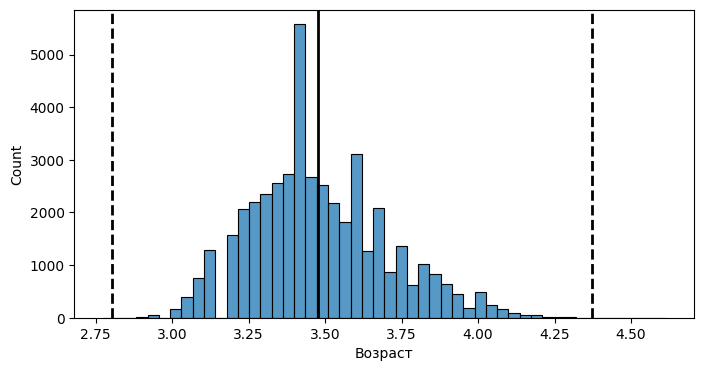

In [ ]:
# ваш код здесь

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_hh_age = np.log(hh_data2['Возраст'] + 1)
print("Численный показатель асимметрии: ", log_hh_age.skew()) #Численный показатель асимметрии; т.к. значение положительное - асимметрия правостороняя

histplot = sns.histplot(log_hh_age, bins=50, ax=ax)

histplot.axvline(log_hh_age.mean(), color='k', lw=2)
histplot.axvline(log_hh_age.mean()+ 4 * log_hh_age.std(), color='k', ls='--', lw=2)
histplot.axvline(log_hh_age.mean()- 3 * log_hh_age.std(), color='k', ls='--', lw=2)


In [ ]:
# Теперь ищем выбросы методом z-отклонения
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    
    if isinstance(data, str):  # Проверка, если передан путь к файлу
        data = pd.read_csv(data)

    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_data2, 'Возраст', left=3, right=4, log_scale=True)
display(outliers)

print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
#print(outliers['sub_area'].unique())

Ищет работу на должность: Последнее/нынешнее место работы  \
31137  Менеджер по работе с клиентами           ООО "ФёрстКэшКомпани"   
32950                 Тестировщик игр                        OOO ЖМЫХ   
33654            Frontend-разработчик                       Freelance   

         Последняя/нынешняя должность Обновление резюме        Авто  \
31137  Менеджер по работе с клиентами        2019-04-06  Не указано   
32950                  Тестировщик ПО        2019-04-09  Не указано   
33654            Frontend-разработчик        2019-04-19  Не указано   

               Образование Пол  Возраст  Опыт работы (месяц)            Город  \
31137              среднее   M       15                    2  Санкт-Петербург   
32950  среднее специальное   M       15                    3           другие   
33654  среднее специальное   M      100                   30  Санкт-Петербург   

       ...  проектная работа  стажировка  волонтерство  полный день  \
31137  ...             False       False         False        False   
32950  ...             False       False         False         True   
33654  ...              True        True         False         True   

       сменный график  гибкий график  удаленная работа  вахтовый метод  \
31137            True           True              True           False   
32950           False          False             False           False   
33654           False           True              True           False   

       ЗП (руб)  Опыт работы (год)  
31137   10000.0                0.0  
32950    2000.0                0.0  
33654   60000.0                2.0  

[3 rows x 24 columns]

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


Численный показатель асисимметрии положительный, значит асимметрия правостороняя
В выброcы попадают  подростки и очень старый сотрудник (что возможно является ошибкой: косвенный признак: малый опыт)